In [1]:
import seaborn as sns
sns.set_theme()

# Load the iris dataset from seaborn
iris = sns.load_dataset("iris")

# Filter the dataset to only include 'versicolor' and 'setosa' species
filtered_iris = iris[iris['species'].isin(['versicolor', 'setosa'])]

# Select only 'sepal_length' and 'sepal_width' variables
filtered_iris = filtered_iris[['sepal_length', 'sepal_width', 'species']]

# Label 'setosa' as 1 and 'versicolor' as -1
filtered_iris['species'] = filtered_iris['species'].map({'setosa': 1, 'versicolor': -1})

sepal_size_inputs = filtered_iris[['sepal_length', 'sepal_width']].to_numpy()
target_species_output = filtered_iris['species'].to_numpy()

In [60]:
import numpy as np
import warnings
#234567891123456789212345678931234567894123456789512345678961234567897123456789
#                                python docstring limit: 72 characters |      
#                                            python code limit: 79 characters |
# test change
class SingleNeuron(object):
    """
    A class used to represent a single neuron (in the machine learning sense).

    ...

    Attributes
    ----------


    Methods 
    -------

    """
    type_perceptron = "perceptron"
    type_linear_regression_1D = "linear regression 1D"

    @classmethod
    def sign(cls, input_value):
        """ 

        """
        if input_value >= 0:
            return 1
        else: 
            return -1
        
    @classmethod
    def linear_1D(cls, input_value):
        """ 

        """
        return input_value

    @classmethod
    def perceptron_loss_function(cls, 
                                 predicted_outputs, 
                                 target_outputs):
        """ 
        
        """
        return (1/4) * np.sum((predicted_outputs - target_outputs)**2)
    
    @classmethod
    def perceptron_stochastic_gradient(cls, 
                                       predicted_output, 
                                       target_output):
        """ 
        
        """
        return (1/2) * (predicted_output - target_output)

    @classmethod
    def linear_regression_loss_function(cls, 
                                        predicted_outputs, 
                                        target_outputs):
        """ 
        
        """
        return (1/(2*target_outputs.size)) \
                * np.sum((predicted_outputs - target_outputs)**2)
        
    @classmethod
    def linear_regression_1D_stochastic_gradient(cls, 
                                                 predicted_output, 
                                                 target_output, 
                                                 training_data_length):
        """ 
        
        """
        return (1/training_data_length) * (predicted_output - target_output)

    @classmethod
    def preactivation(cls, input, weights, bias):
        """ 
        
        """
        if not (np.shape(input) == np.shape(weights)):
            raise ValueError("Input vector must have the same shape as weights"
                + "vector." + f"{np.shape(input) = },  {np.shape(weights) = }")
        
        return np.dot(input, weights) + bias
    
    def __init__(self, 
                 data_dimension, 
                 model_type, 
                 weights=None, 
                 bias=None, 
                 activation_function=None):
        """
        
        """
        self.data_dimension = data_dimension 
        # A single number for each feature vector has dimension 1, 
        # a 2D vector has dimension 2, etc.

        self.model_type = model_type

        if activation_function is None:
            if self.model_type == SingleNeuron.type_perceptron:
                self.activation_function = SingleNeuron.sign
            elif self.model_type == SingleNeuron.type_linear_regression_1D:
                self.activation_function = SingleNeuron.linear_1D
        else:
            self.activation_function = activation_function
        
        if weights is None:
            self.weights = np.random.randn(data_dimension)
            if data_dimension == 1:
                # Unwrap weights to a scalar if there's only one weight
                # This avoids additional checks in preactivation
                self.weights = self.weights[0]
        else:
            self.weights = weights
        self.previous_weights = self.weights

        if bias is None:
            self.bias = np.random.randn()
        else:
            self.bias = bias
        self.previous_bias = self.bias

    def predict_outputs(self, 
                        inputs, 
                        weights=None, 
                        bias=None, 
                        use_current_weights_and_bias=True):
        """ 
        
        """
        if use_current_weights_and_bias:
            weights = self.weights
            bias = self.bias

        if np.isscalar(inputs):
            if self.data_dimension != 1:
                raise ValueError("Mismatch between expected feature vector "
                    + f"dimension ({self.data_dimension = }) and input " 
                    + f"shape ({np.shape(inputs) = }).")
            else:
                return self.activation_function(
                    SingleNeuron.preactivation(inputs, weights, bias))

        elif inputs.shape == (self.data_dimension,):
            return self.activation_function(
                SingleNeuron.preactivation(inputs, weights, bias))
        
        elif inputs.shape[-1] == self.data_dimension    \
                or (self.data_dimension == 1 and inputs.ndim == 1):
            return [self.activation_function(
                        SingleNeuron.preactivation(input, weights, bias)) 
                    for input in inputs]

        else: 
            raise ValueError("Mismatch between expected feature vector "
                + f"dimension ({self.data_dimension = }) and input " 
                + f"shape ({np.shape(inputs) = }).")
    
    def current_weights(self):
        """ 
        
        """
        return self.weights.copy()
    
    def current_bias(self):
        """ 
        
        """
        return self.bias

    def current_weights_and_bias(self):
        """ 
        
        """
        return (self.weights.copy(), self.bias)
    
    def perceptron_stochastic_gradient_update(self, 
                                              input, 
                                              target_output):
        """ 
        learning_rate does nothing and is just for making it more uniform to pass around update functions
        """
        gradient = SingleNeuron.perceptron_stochastic_gradient(
                        self.predict_outputs(input), target_output)
        self.weights -= gradient * input
        self.bias -= gradient
        return gradient

    def linear_regression_1D_stochastic_gradient_update(self, 
                                                        input, 
                                                        target_output, 
                                                        learning_rate, 
                                                        training_data_length):
        gradient = SingleNeuron.linear_regression_1D_stochastic_gradient(
                                                self.predict_outputs(input), 
                                                target_output, 
                                                training_data_length)
        self.weights -= learning_rate * gradient * input
        self.bias -= learning_rate * gradient
        return gradient
        
    def train(self, 
              inputs, 
              target_outputs, 
              learning_rate=0.5, 
              num_epochs=50):
        """ 
        
        """
        self.previous_weights = np.copy(self.weights)
        self.previous_bias = np.copy(self.bias)
        weight_update = None
        loss_function = None
        
        if self.model_type is SingleNeuron.type_perceptron:
            weight_update = self.perceptron_stochastic_gradient_update
            loss_function = SingleNeuron.perceptron_loss_function
            
        elif self.model_type is SingleNeuron.type_linear_regression_1D:
            weight_update = lambda input, target : \
                self.linear_regression_1D_stochastic_gradient_update(
                        input, target, learning_rate, len(target_outputs))
            loss_function = SingleNeuron.linear_regression_loss_function

        loss_at_epoch = np.empty(1 + num_epochs)
        loss_at_epoch[0] = loss_function(self.predict_outputs(inputs),
                                         target_outputs)

        for epoch_index in range(num_epochs):
            for input, target_output in zip(inputs, target_outputs):
                weight_update(input, target_output)
                
            loss_at_epoch[epoch_index+1] = loss_function(
                    self.predict_outputs(inputs), target_outputs)

        return loss_at_epoch

    def reset_model(self):
        """ 
        
        """
        if self.data_dimension == 1:
            self.weights = np.random.randn()
        else: 
            self.weights = np.random.randn(self.weights.shape)
        self.bias = np.random.randn()

    def forget_previous_training(self):
        """ 
        
        """
        self.weights = np.copy(self.previous_weights)
        self.bias = np.copy(self.previous_bias)

# todo
    def __repr__(self):
        """ 
        
        """
        return self
    
# might not be necessary
    # def __call__(self):
    #     return self

In [3]:
import matplotlib.pyplot as plt

In [4]:
sepal_length_inputs = filtered_iris['sepal_length'][filtered_iris['species'] == 1].to_numpy()
target_sepal_width_outputs = filtered_iris['sepal_width'][filtered_iris['species'] == 1].to_numpy()

In [61]:
linreg_test = SingleNeuron(1, model_type=SingleNeuron.type_linear_regression_1D)
print(f"{linreg_test.current_weights_and_bias() = }")

linreg_test.current_weights_and_bias() = (0.30146432368966314, -2.0185828672717925)


In [67]:
linreg_test.reset_model()

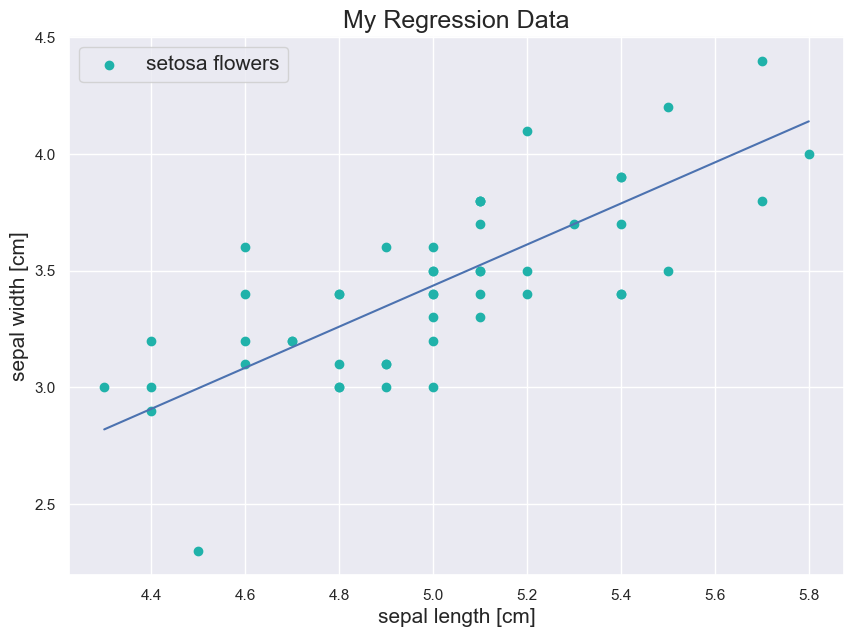

In [70]:
plt.figure(figsize = (10, 7))
plt.scatter(sepal_length_inputs, 
            target_sepal_width_outputs, 
            color = "lightseagreen",
            label = "setosa flowers")
plt.xlabel("sepal length [cm]", fontsize = 15)
plt.ylabel("sepal width [cm]", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("My Regression Data", fontsize = 18)
x = np.linspace(sepal_length_inputs.min(), sepal_length_inputs.max())
plt.plot(x, linreg_test.weights*x + linreg_test.bias)
plt.show()

In [69]:
linreg_test.train(sepal_length_inputs, target_sepal_width_outputs)

array([2.52723988, 0.03221564, 0.03221257, 0.03220952, 0.03220649,
       0.03220348, 0.03220048, 0.03219749, 0.03219452, 0.03219157,
       0.03218863, 0.0321857 , 0.03218279, 0.03217989, 0.03217701,
       0.03217414, 0.03217129, 0.03216844, 0.03216562, 0.03216281,
       0.03216001, 0.03215722, 0.03215445, 0.0321517 , 0.03214895,
       0.03214623, 0.03214351, 0.03214081, 0.03213812, 0.03213544,
       0.03213278, 0.03213013, 0.0321275 , 0.03212488, 0.03212227,
       0.03211967, 0.03211709, 0.03211452, 0.03211196, 0.03210941,
       0.03210688, 0.03210436, 0.03210186, 0.03209936, 0.03209688,
       0.03209441, 0.03209196, 0.03208951, 0.03208708, 0.03208466,
       0.03208225])

In [ ]:
grad_update0 = linreg_test.linear_regression_1D_stochastic_gradient_update(sepal_length_inputs[0], target_sepal_width_outputs[0], 0.5, 1)
print(f"{grad_update0 = }")

In [43]:
grad0 = SingleNeuron.linear_regression_1D_stochastic_gradient(linreg_test.predict_outputs(sepal_length_inputs[0]), target_sepal_width_outputs[0], 1)
print(f"{grad0 = }")

grad0 = -6.682880537030627


In [42]:
loss0 = SingleNeuron.linear_regression_loss_function(linreg_test.predict_outputs(sepal_length_inputs[0]), target_sepal_width_outputs[0])
print(f"{loss0 = }")

loss0 = 22.33044613611138


In [51]:
linreg_test.predict_outputs(sepal_length_inputs[0])

14.671581436037012

In [ ]:

print(f"{np.isscalar(sepal_length_inputs[0]) = }")
print(f"{linreg_test.data_dimension = }")

In [ ]:
print(f"{np.shape(sepal_length_inputs[0]) = }")
print(f"{np.shape(5) = }")
print(f"{np.shape(linreg_test.weights) = }")
print(f"{np.isscalar(linreg_test.weights)}")

In [ ]:
print(f"{np.shape(sepal_length_inputs[0]) = }")
print(f"{np.shape([sepal_length_inputs[0]]) = }")
print(f"{np.shape(linreg_test.weights) = }")
print(f"{np.shape([linreg_test.weights]) = }")
print(f"{np.shape(sepal_size_inputs[0]) = }")
print(f"{np.shape([sepal_size_inputs[0]]) = }")
print(f"{np.shape(model.weights) = }")
print(f"{np.shape([model.weights]) = }")
print(f"{np.shape(np.random.randn(2)) = }")
print(f"{np.shape(np.asarray(sepal_length_inputs[0])) = }")

In [ ]:
model = SingleNeuron(sepal_size_inputs.shape[1], model_type="perceptron")
model.current_weights_and_bias()

In [ ]:
model.perceptron_stochastic_gradient_update(sepal_size_inputs[4], target_species_output[4])

In [ ]:
model.train(sepal_size_inputs, target_species_output, num_epochs=1000)

In [ ]:
model.perceptron_stochastic_gradient_update(sepal_size_inputs[-1], target_species_output[-1])

In [ ]:
print(f"{model.predict_outputs(sepal_size_inputs[0]) = }, but  {target_species_output[0] = }")
gradient = SingleNeuron.perceptron_stochastic_gradient(model.predict_outputs(sepal_size_inputs[0]), target_species_output[0])
print(f"{gradient = }")

In [ ]:
model.reset_model()
model.current_weights_and_bias()

In [ ]:
predicted_outputs = model.predict_outputs(sepal_size_inputs)
print(f"{SingleNeuron.perceptron_loss_function(predicted_outputs, target_species_output) = }")
#hmm... why is this consistently outputting 50...
plt.figure(figsize=(8,6))
plt.scatter(sepal_size_inputs[target_species_output == 1, 0], 
            sepal_size_inputs[target_species_output == 1, 1], 
            color="magenta", label="Setosa (1)")
plt.scatter(sepal_size_inputs[target_species_output == -1, 0], 
            sepal_size_inputs[target_species_output == -1, 1], 
            color="green", label="Versicolor (-1)")
x = np.linspace(sepal_size_inputs[:,0].min(), sepal_size_inputs[:,0].max())
plt.plot(x, (-model.weights[0]*x - model.bias) / model.weights[1]) 

#Oh if it's frequently outputting 50 because it's getting 50 values wrong most of the time!

In [ ]:
print(f"{model.predict_outputs(sepal_size_inputs[0]) = }")
print(f"{model.predict_outputs(sepal_size_inputs[0:3]) = }")

In [ ]:
preactivation_value = SingleNeuron.preactivation(sepal_size_inputs[0], model.weights, model.bias)
print(f"{preactivation_value = }")
print(f"{model.activation_function(preactivation_value) = }")

In [ ]:
print(f"{[sepal_size for sepal_size in sepal_size_inputs[0,:]] = }")

In [ ]:
sepal_size_inputs[0].ndim

In [ ]:
print(f"{SingleNeuron.preactivation(sepal_size_inputs[0], model.weights, model.bias) = }")
print(f"{np.dot(sepal_size_inputs[0], model.weights) + model.bias = }")

In [ ]:
print(f"{SingleNeuron.sign(-0.00001) = }")
print(f"{SingleNeuron.linear_1D(523/100) = }")

In [ ]:
sepal_size_inputs.shape

In [ ]:
sepal_size_inputs[target_species_output==1,1]

In [ ]:
print(f"{model.current_weights_and_bias() = }")
[current_weights, current_bias] = model.current_weights_and_bias()
print(f"{sepal_size_inputs[1] = }")
print(f"{SingleNeuron.preactivation(sepal_size_inputs[1], current_weights, current_bias) = }")
preactivation_value = SingleNeuron.preactivation(sepal_size_inputs[1], current_weights, current_bias)
print(f"{model.activation_function(preactivation_value) = }")
print(f"{model.predict_outputs(sepal_size_inputs[1]) = }")
inputs = sepal_size_inputs
activation_values = [model.activation_function(SingleNeuron.preactivation(input, current_weights, current_bias)) for input in inputs]
print(f"{activation_values = }")
print(f"{model.predict_outputs(inputs) = }")

In [ ]:
[(SingleNeuron.sign(SingleNeuron.preactivation(sepal_size_inputs[1], model.current_weights(), model.current_bias())))]

In [ ]:
print(f"{sepal_size_inputs[1] = }")
print(f"{np.shape(sepal_size_inputs[1]) = } but {np.shape(model.current_weights()) = }")

In [ ]:
SingleNeuron.sign(np.float64(3.3034947687319463))

In [ ]:
print(f"{SingleNeuron.sign(0) = }")
print(f"{SingleNeuron.linear_1D(8.3) = }")

In [ ]:
print(f"{sepal_size_inputs.shape = }")
print(f"{sepal_size_inputs.shape[1] = }")
print(f"{sepal_size_inputs[1] = }")

In [ ]:
x = np.random.randn(3)
type(x) == np.ndarray

In [ ]:
y = np.random.randn(4)

In [ ]:
np.dot(x,y)

In [ ]:
np.dot(2,4)

In [ ]:
for xval in x:
    print(xval)

In [ ]:
a = np.zeros((2,2))
b = np.copy(a)
a[0,0] = 1
a[1,0] = 2
print(a)
print(b)
print(np.copy(3))

In [ ]:
print([A for A in a])